# Disentanglix development

## Testing with real data

In [1]:
import autoencodix as acx
from autoencodix.data.datapackage import DataPackage
from autoencodix.utils.default_config import DataCase
from autoencodix.utils.default_config import DefaultConfig
import pandas as pd

df_rna = pd.read_parquet("./input_data_test/combined_rnaseq_formatted.parquet")
df_meth = pd.read_parquet("./input_data_test/combined_meth_formatted.parquet")
df_anno = pd.read_parquet("./input_data_test/combined_clin_formatted.parquet")

data_package = DataPackage()
data_package.multi_bulk = {"transcriptomics": df_rna, "epigenetic": df_meth}
data_package.annotation = {
	"paired": df_anno.copy(),
}


my_cfg = DefaultConfig(
	data_case=DataCase.MULTI_BULK,
	loss_reduction="sum",
	k_filter=2000,
	latent_dim=2,
	scaling="STANDARD",
	filtering="VAR",
	epochs=200,
	learning_rate=0.0005,
	batch_size = 128,
	beta_mi = 1,
	beta_tc = 10,
	beta_dimKL=0.01,
	use_mss = True,
	drop_p =0.1,
	global_seed=42,
	checkpoint_interval=25,
	n_layers=1)

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
disent = acx.Disentanglix(data=data_package, config=my_cfg)


in handle_direct_user_data with data: <class 'autoencodix.data.datapackage.DataPackage'>


In [3]:
disent.run()

 n_samples: {'multi_sc': {'multi_sc': 0}, 'multi_bulk': {'transcriptomics': 3529, 'epigenetic': 3529}, 'annotation': {'paired': 3529}, 'img': {'img': 0}, 'from_modality': {}, 'to_modality': {}, 'paired_count': {'paired_count': 3529}}
cur shape: transcriptomics: (2470, 1000)
cur shape: epigenetic: (2470, 1000)
cur shape: transcriptomics: (706, 1000)
cur shape: epigenetic: (706, 1000)
cur shape: transcriptomics: (353, 1000)
cur shape: epigenetic: (353, 1000)
Epoch 25/200 - Train Loss: 3668942.1875
Sub-losses: recon_loss: 3668923.9219, mut_info_loss: 4.3317, tot_corr_loss: 9.6101, dimwise_kl_loss: 4.3530, anneal_factor: 0.0005, effective_beta_mi_factor: 0.0005, effective_beta_tc_factor: 0.0050, effective_beta_dimKL_factor: 0.0000
Epoch 25/200 - Valid Loss: 521568.5938
Sub-losses: recon_loss: 521566.0156, mut_info_loss: 0.6249, tot_corr_loss: 1.2932, dimwise_kl_loss: 0.6777, anneal_factor: 0.0005, effective_beta_mi_factor: 0.0005, effective_beta_tc_factor: 0.0050, effective_beta_dimKL_fact

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'mut_info_loss': TrainingDynamics(), 'tot_corr_loss': TrainingDynamics(), 'dimwise_kl_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_mi_factor': TrainingDynamics(), 'effective_beta_tc_factor': TrainingDynamics(), 'effective_beta_dimKL_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: VarixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._numeric_dataset.NumericDataset object at 0x704225428fa0>, valid=<autoencodix.data._numeric_dataset.NumericDataset object at 0x70422542bb50>, test=<autoencodix.data._numeric_dataset.NumericDataset object

Creating plots ...


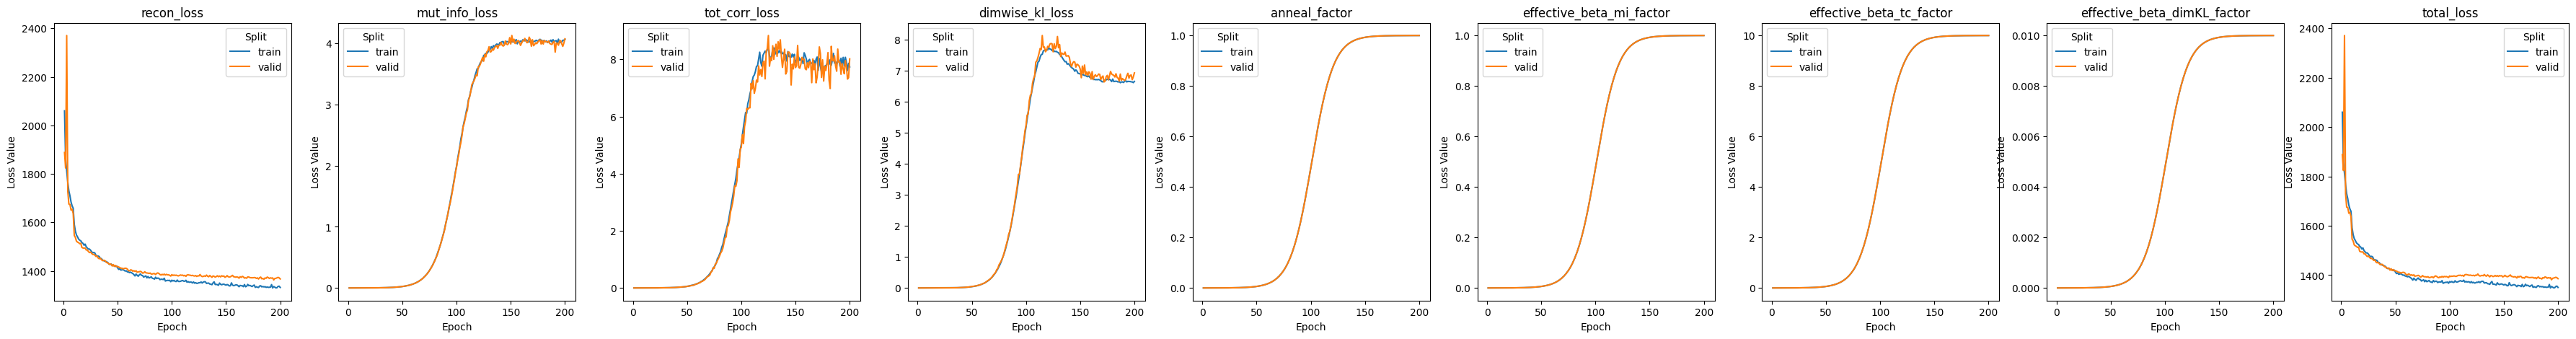

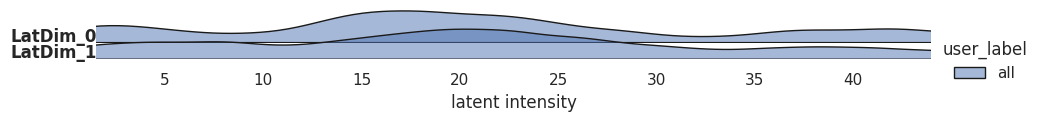

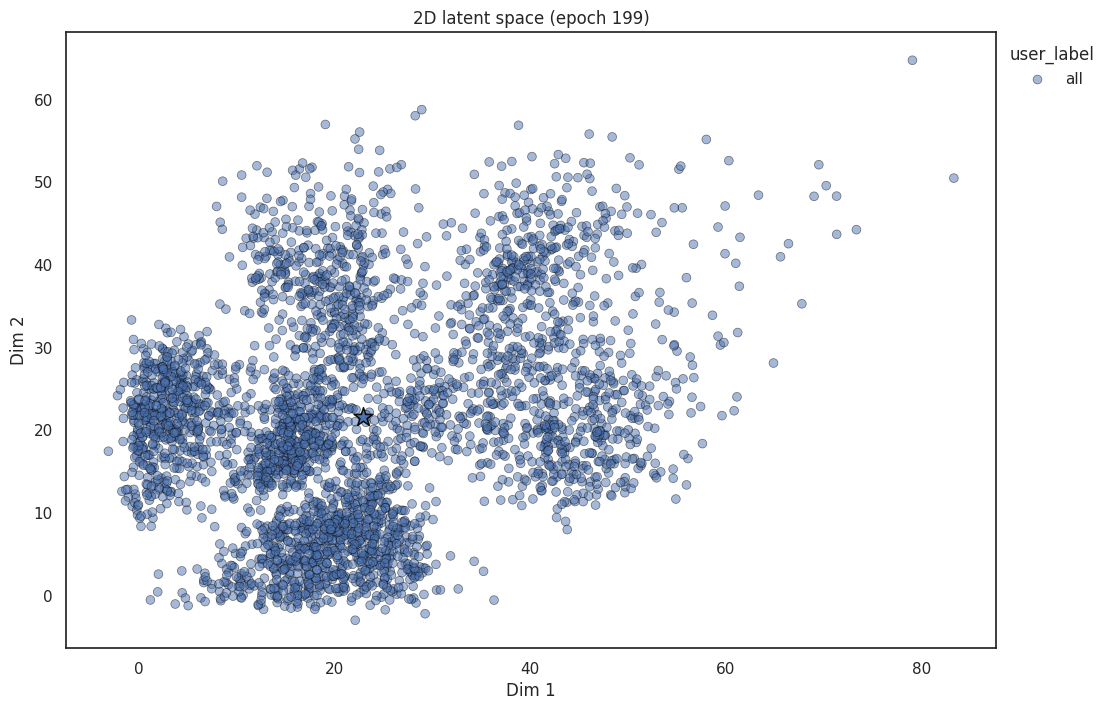

In [4]:
disent.show_result()

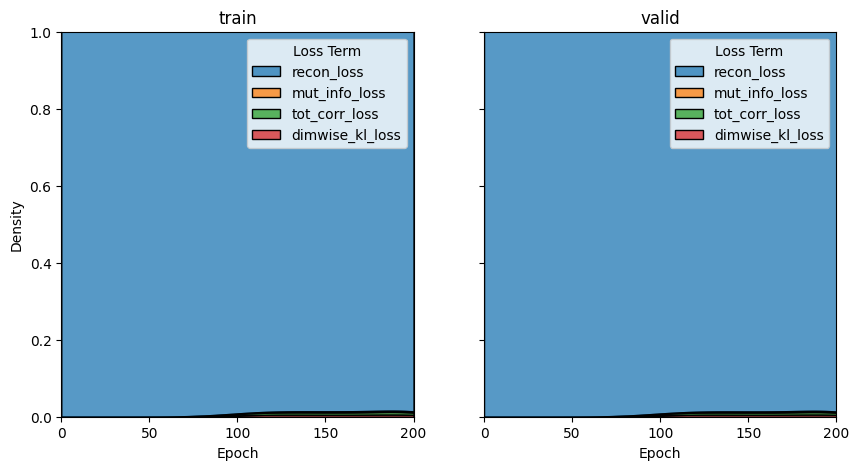

In [5]:
disent._visualizer.show_loss(plot_type="relative")

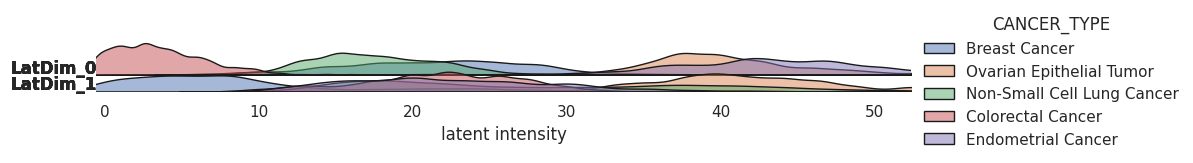

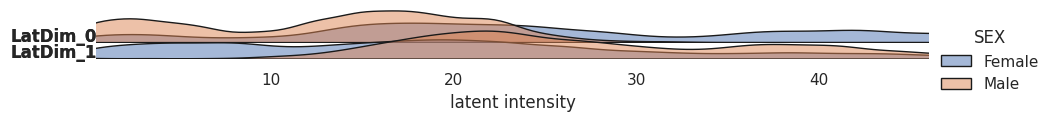

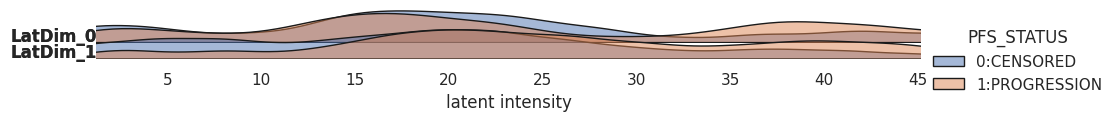

In [6]:
disent._visualizer.show_latent_space(result=disent.result, plot_type="Ridgeline", param=["CANCER_TYPE","SEX","PFS_STATUS"])

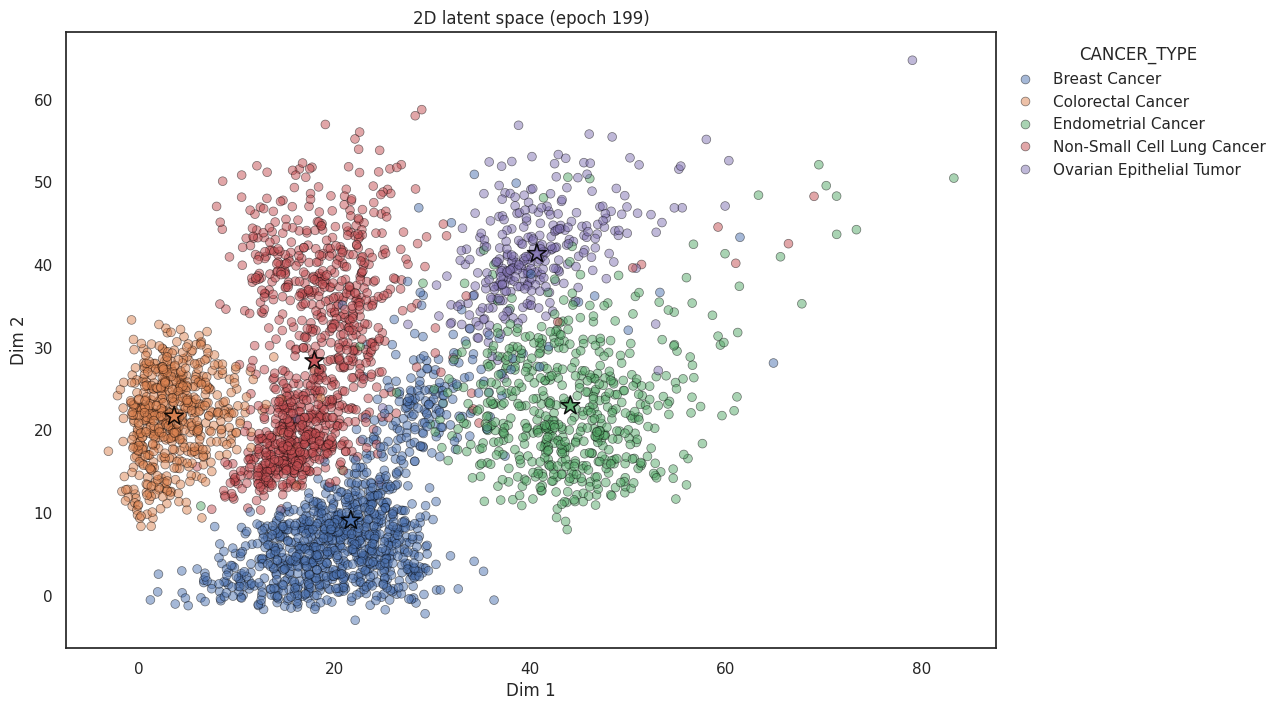

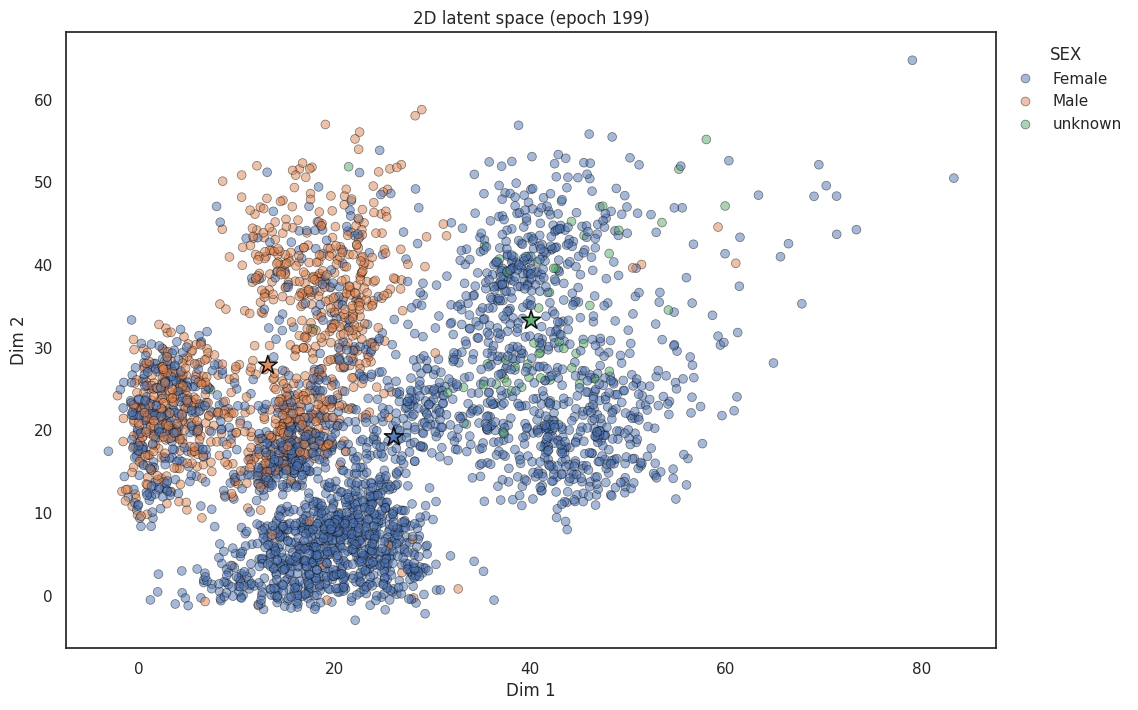

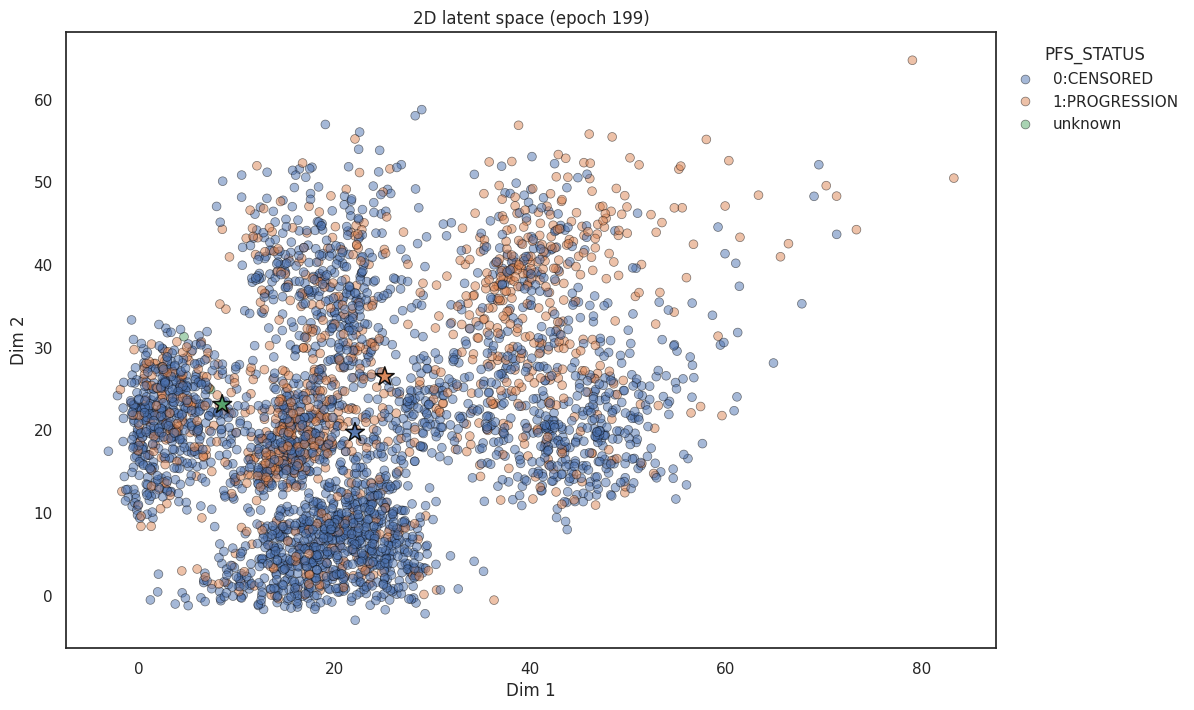

In [7]:
disent._visualizer.show_latent_space(result=disent.result, plot_type="2D-scatter", param=["CANCER_TYPE","SEX","PFS_STATUS"])

## Train a Varix for comparison

in handle_direct_user_data with data: <class 'autoencodix.data.datapackage.DataPackage'>
 n_samples: {'multi_sc': {'multi_sc': 0}, 'multi_bulk': {'transcriptomics': 3529, 'epigenetic': 3529}, 'annotation': {'paired': 3529}, 'img': {'img': 0}, 'from_modality': {}, 'to_modality': {}, 'paired_count': {'paired_count': 3529}}
cur shape: transcriptomics: (2470, 1000)
cur shape: epigenetic: (2470, 1000)
cur shape: transcriptomics: (706, 1000)
cur shape: epigenetic: (706, 1000)
cur shape: transcriptomics: (353, 1000)
cur shape: epigenetic: (353, 1000)
Epoch 25/200 - Train Loss: 3620336.9961
Sub-losses: recon_loss: 3620286.2344, var_loss: 50.8079, anneal_factor: 0.0005, effective_beta_factor: 0.0001
Epoch 25/200 - Valid Loss: 513823.3750
Sub-losses: recon_loss: 513815.6406, var_loss: 7.7422, anneal_factor: 0.0005, effective_beta_factor: 0.0001
Epoch 50/200 - Train Loss: 3490237.9922
Sub-losses: recon_loss: 3489135.9258, var_loss: 1102.0652, anneal_factor: 0.0061, effective_beta_factor: 0.0006
E

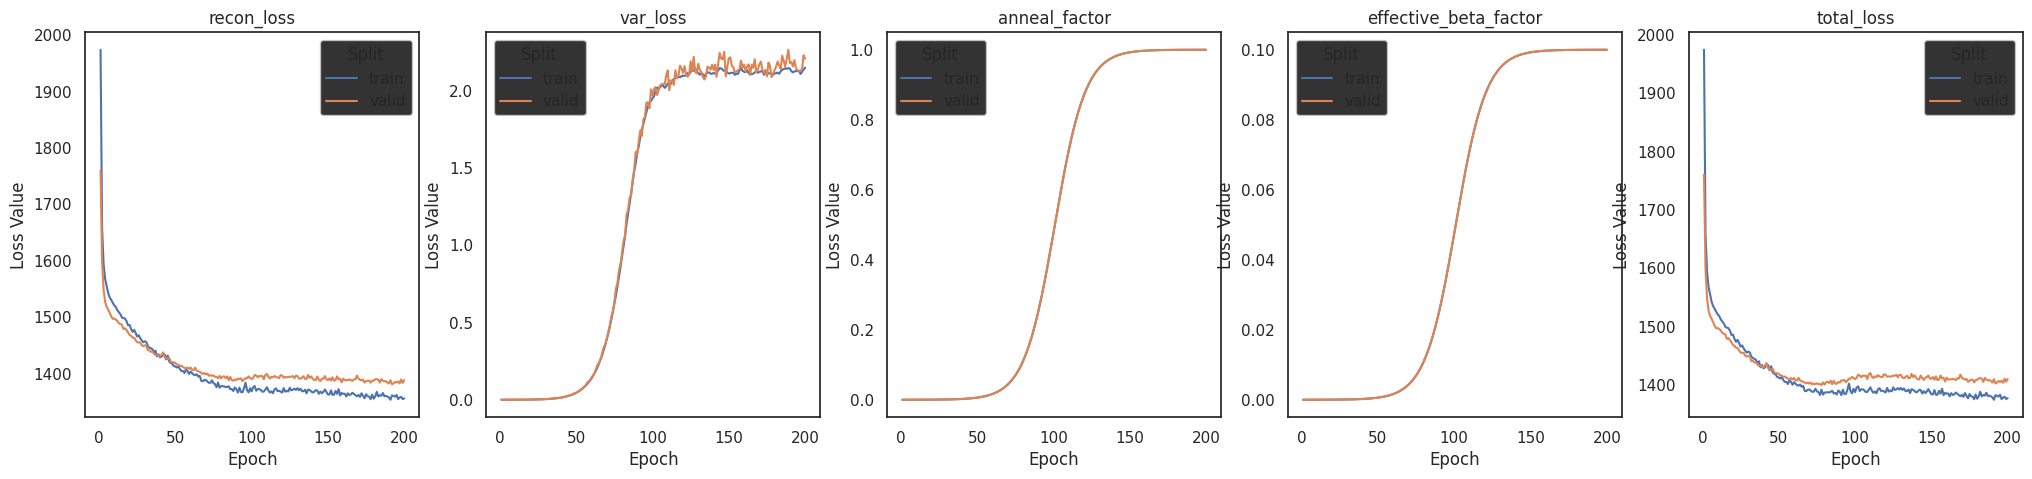

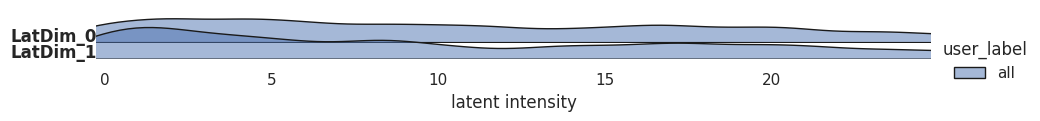

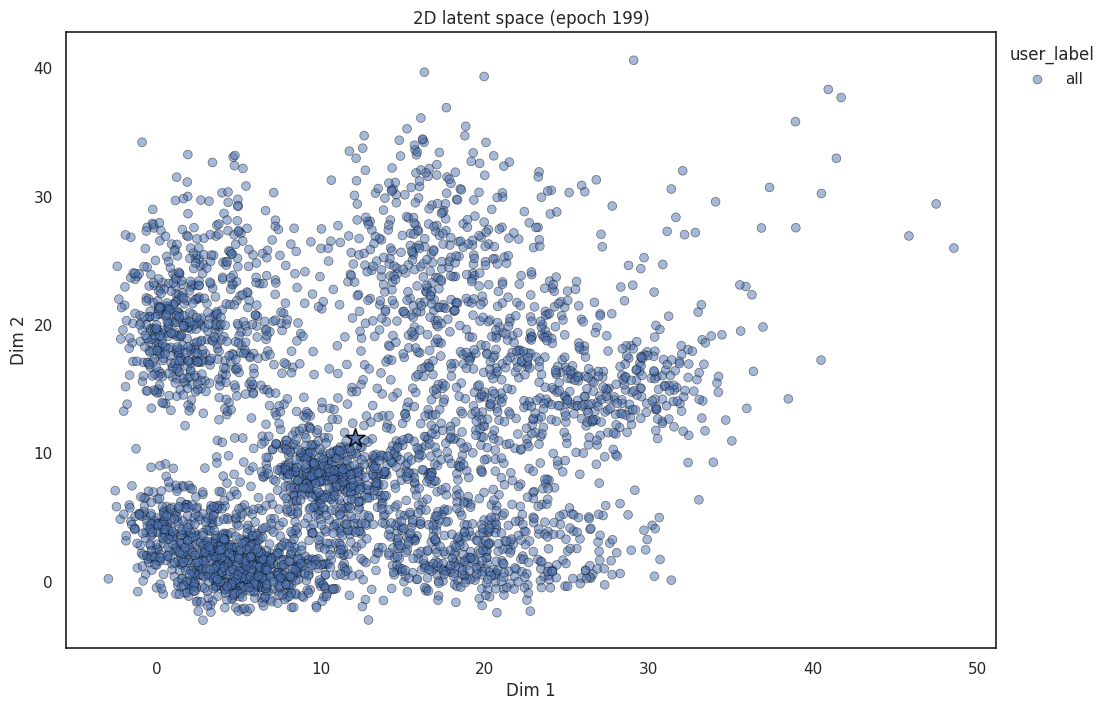

In [8]:
## Varix for comparison
my_cfg.beta = 0.1
varix = acx.Varix(data=data_package, config=my_cfg)
varix.run()
varix.show_result()

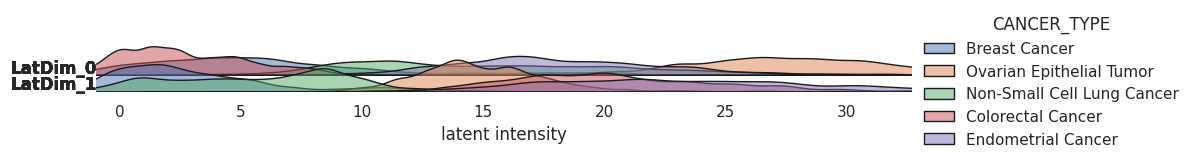

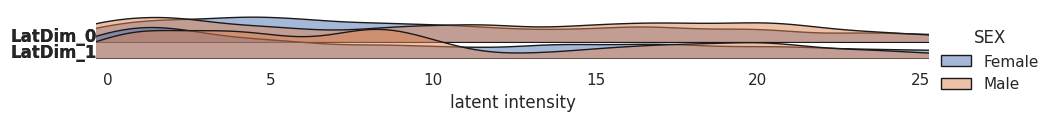

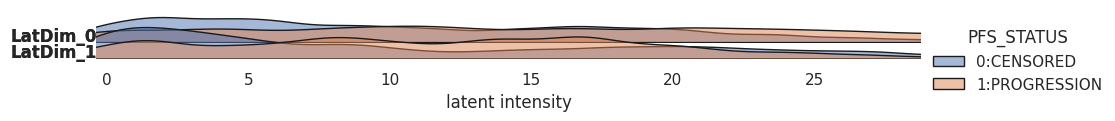

In [9]:
varix._visualizer.show_latent_space(result=varix.result, plot_type="Ridgeline", param=["CANCER_TYPE","SEX","PFS_STATUS"])

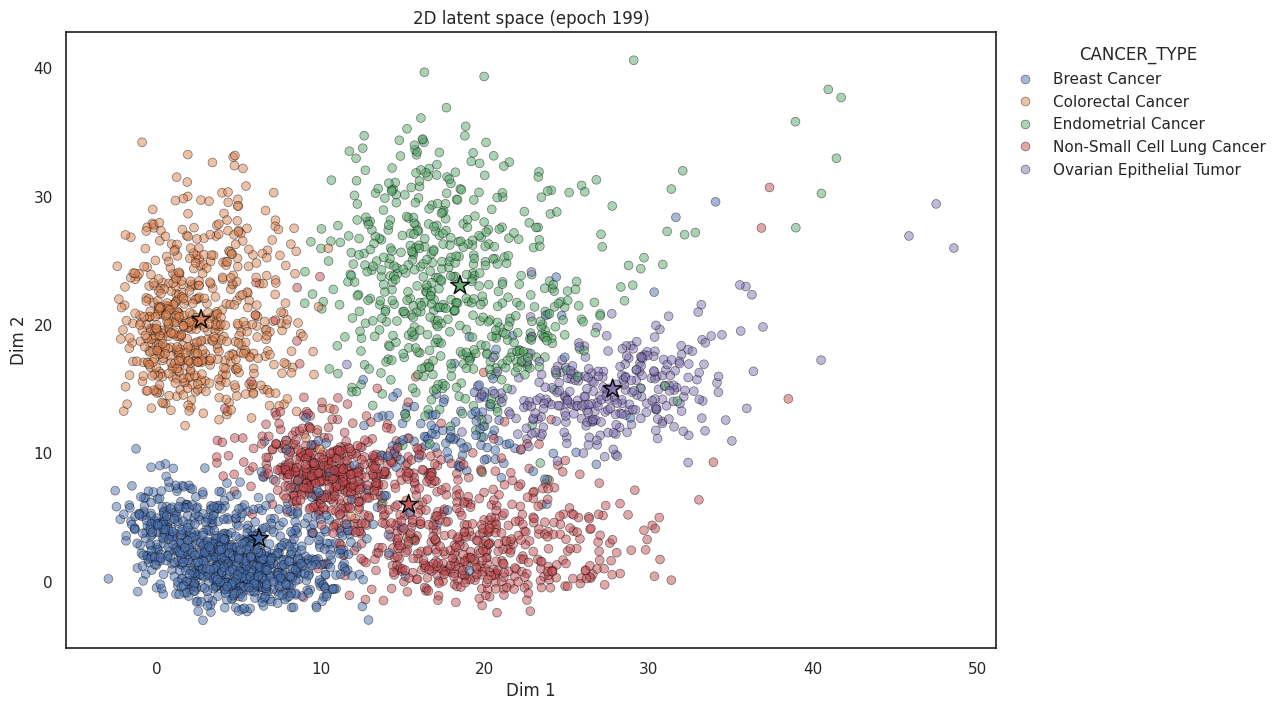

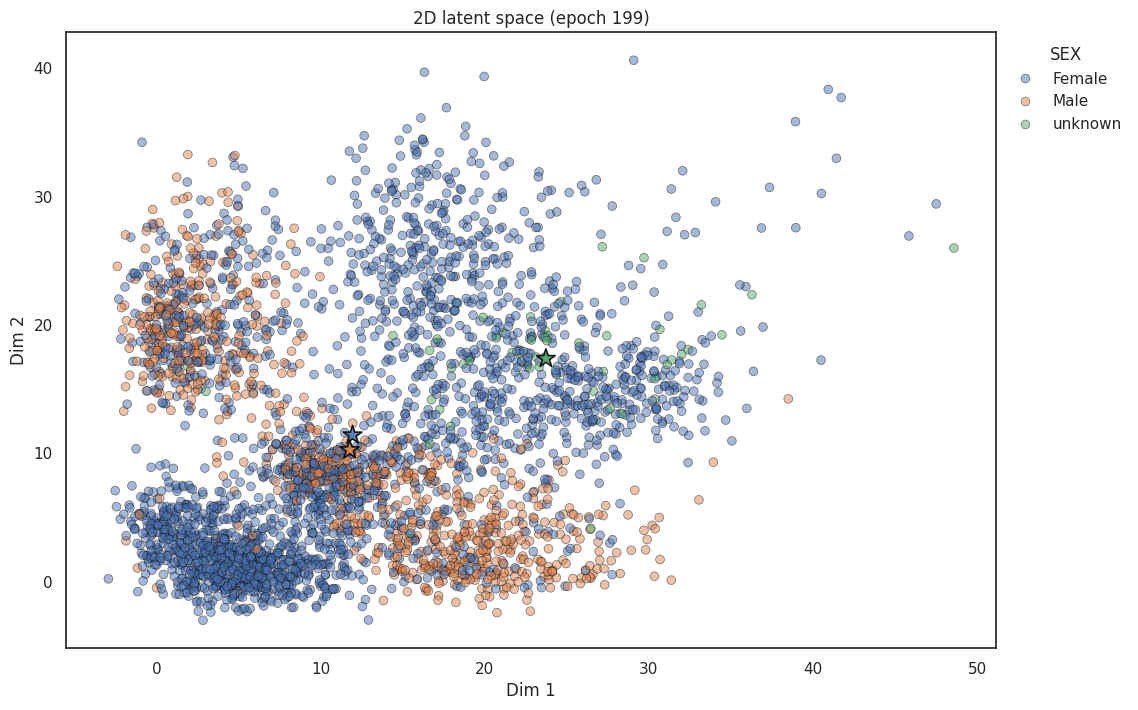

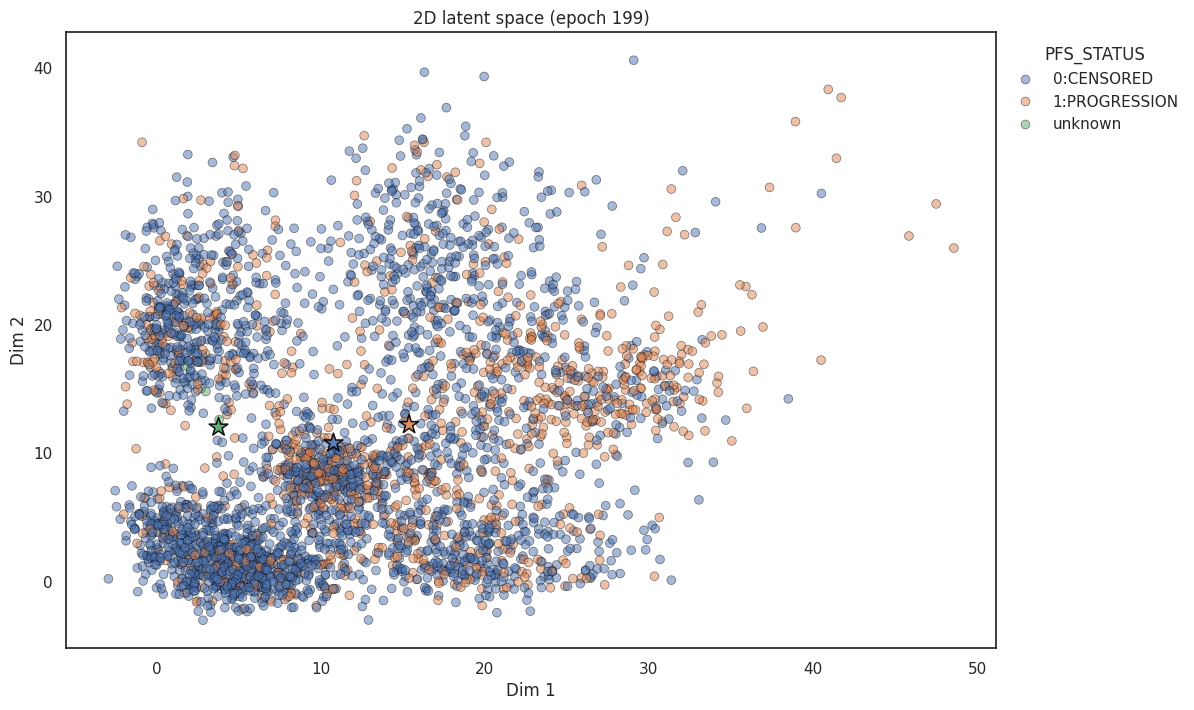

In [10]:
varix._visualizer.show_latent_space(result=varix.result, plot_type="2D-scatter", param=["CANCER_TYPE","SEX","PFS_STATUS"])